In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from hmtool import *

### Linear estimators

In [3]:
help(lsm_linear_fit)

Help on function lsm_linear_fit in module hmtool:

lsm_linear_fit(x, y, sy=[0])
    linear fit by least square method
    
    problem definition: y = ax +b
    
    #parameters
    x:np.array 
    y:np.array; data same length of x 
    sy = np.array; same length of x
    
    return A,cov_matrix
    
    A = parameters
    A[0] = a
    A[1] = b
    
    return A,cov_matrix,sy_estimate
    cov_matrix = covariance matrix
    
    ###example1: lsm_linear_fit(x,y,sy)
    y = np.array([ 0.5*i+7 +np.random.rand(1)[0] for i in range(0,100)])
    sy = np.ones(100)
    x = np.arange(0,100)
    A,cov_matrix,_ = lsm_linear_fit(x,y,sy)
    
    ###example2: lsm_linear_fit(x,y)
    #y = np.array([ 0.5*i+7 +np.random.rand(1)[0] for i in range(0,100)])
    #x = np.arange(0,100)
    #A,cov_matrix,sy_estimate = lsm_linear_fit(x,y)



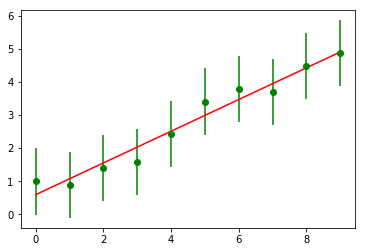

In [4]:
### example1: lsm_linear_fit(x,y,sy)
y = np.array([ 0.5*i +np.random.rand(1)[0] for i in range(0,10)])
sy = np.ones(10)
x = np.arange(0,10)
A,cov_matrix,_ = lsm_linear_fit(x,y,sy)

plt.errorbar(x,y,yerr=sy,marker='o',linestyle=' ', color='green')
plt.plot(x,A[0]*x+A[1],color= 'r')

Warning!!! The program is estimating the data deviation
data deviation estimated:

0.22198812204330232



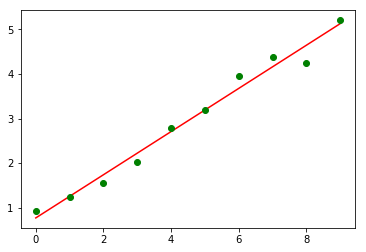

In [5]:
### example2: lsm_linear_fit(x,y)
y = np.array([ 0.5*i +np.random.rand(1)[0] for i in range(0,10)])
x = np.arange(0,10)
A,cov_matrix,sy_estimate = lsm_linear_fit(x,y)

plt.errorbar(x,y,marker='o',linestyle=' ', color='green')
plt.plot(x,A[0]*x+A[1],color= 'r')

### One decay exponential fit

In [6]:
help(exponential_decai_p_estimator)

Help on function exponential_decai_p_estimator in module hmtool:

exponential_decai_p_estimator(tt, yy, sy, pp, n_gauss=0)
    parameter estimator for exponential decay model
    
    #model yy = I0*exp(-p*tt)+BG
    
    entries:
    
    tt=array
    yy=array same length tt
    sy=deviation of yy
    pp = trie this pp parameters they need to be positives
    
    return
    [p,I0,BG],QQ,cov_matrix,chi2_refined
    [p,I0,BG] = fitted parameters
    QQ = chi2 for each p tried
    cov_matrix = covariance matrix of parameters
    chi2_refined = chi2 of the fitted curve
    
    #####################################
    ### example:
    import matplotlib.pyplot as plt
    tt = np.arange(0,60)
    p = 0.206
    BG = 40
    I0=1000
    pp = [i/1000 for i in range(1,1001)]
    
    sy = np.sqrt(I0*np.exp(-p*tt) + BG)
    yy = np.array([I0*np.exp(-p*tt[i]) +BG + np.random.normal(0,sy[i]) for i in range(len(tt))])
    params,chi2,cov_matrix,chi2_refined = exponential_decai_p_estimator(tt,yy,sy

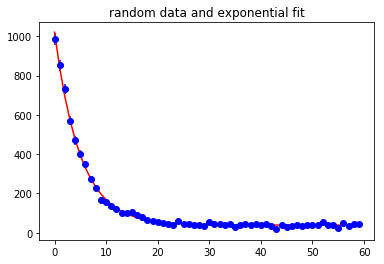

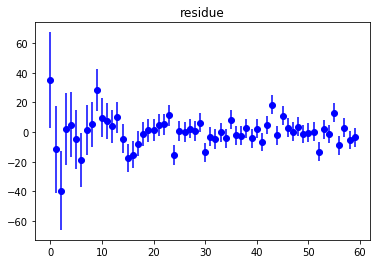

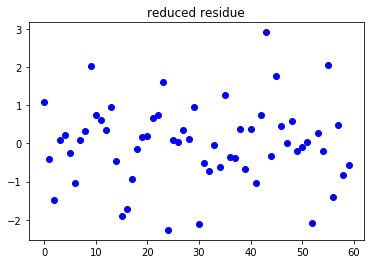

chi2 =  62.86747129758574


In [7]:
import matplotlib.pyplot as plt
tt = np.arange(0,60)
p = 0.206
BG = 40
I0 = 1000
pp = [i/1000 for i in range(1,1001)]

sy = np.sqrt(I0*np.exp(-p*tt) + BG)
yy = np.array([I0*np.exp(-p*tt[i]) +BG + np.random.normal(0,sy[i]) for i in range(len(tt))])
params,chi2,cov_matrix,chi2_refined = exponential_decai_p_estimator(tt,yy,sy,pp,n_gauss=10)
[p,I0,BG]=params

plt.figure(1)
plt.title('random data and exponential fit')
plt.errorbar(tt,yy,yerr=sy, marker='o',linestyle=' ',label='data',color='blue')
plt.plot(tt,I0*np.exp(-p*tt) +BG,label='fit',color='r')

residue = [(I0*np.exp(-p*tt[i]) + BG - yy[i]) for i in range(len(yy))]

plt.figure(2)
plt.title('residue')
plt.errorbar(tt,residue,yerr=sy,marker='o',linestyle=' ',color='blue')
plt.show()

plt.title('reduced residue')
plt.errorbar(tt,residue/sy,marker='o',linestyle=' ',color='blue')
plt.show()
print('chi2 = ',chi2_refined)

In [8]:
help(double_exponential_decai_p_estimator)

Help on function double_exponential_decai_p_estimator in module hmtool:

double_exponential_decai_p_estimator(tt, yy, sy, pp1, pp2, n_gauss=0)
    estimate 2 exponential decay
     
     obs: It is admited that the data entries are not correlated
    
     data model:
     yy = BG+I01*exp(-p1*t)+I02*exp(-p2*t)
     
     entries:
     tt = numpy array
     yy = numpy array, same length tt
     sy = numpy array, same length tt
     pp1 = numpy array, tries this p1 values 
     pp2 = numpy array, tries this p2 values
     n_gauss = int, iterate gauss method n_gauss times
     return:
     params = [BG,I01,I02,p1,p2] = vector, stimated parameters 
     cov_matrix = 2D numpy array, covariation matrix
     chi2 = float, chi-square
     residue = numpy array, vector to plot the residues
     QQ = 2D numpy array, length(pp1) X length(pp2), to plot 3D the guessed region
    
    ###example:
     #########################################
     import matplotlib.pyplot as plt
     tt = np.arange(

[40.61534357349605, 1095.6488396760533, 107.24447506656644, 0.27, 0.08]




[40.61534357349605, 1095.6488396760533, 107.24447506656644, 0.27, 0.08]
[[ 1.00695490e+01 -1.82654625e+02  1.90446060e+02  4.19480814e-02
   1.01859272e-01]
 [-1.82654625e+02  5.61574939e+03 -5.50626599e+03 -1.22767640e+00
  -2.57003067e+00]
 [ 1.90446060e+02 -5.50626599e+03  6.13252103e+03  1.51824966e+00
   2.78796841e+00]
 [ 4.19480814e-02 -1.22767640e+00  1.51824966e+00  4.32655682e-04
   6.54746354e-04]
 [ 1.01859272e-01 -2.57003067e+00  2.78796841e+00  6.54746354e-04
   1.34440957e-03]]
50.23007708121425


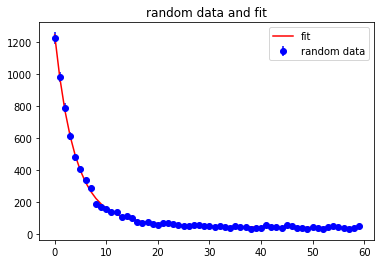

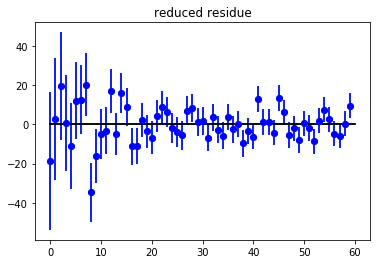

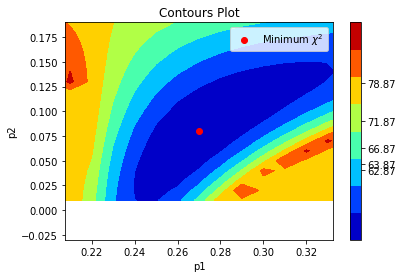

In [9]:
###example:
#########################################
import matplotlib.pyplot as plt
tt = np.arange(0,60)
p1 = 0.3
I10 = 1000
p2 = 0.1
I20 = 200
BG = 40

sy = np.sqrt(I10*np.exp(-p1*tt)+ I20*np.exp(-p2*tt) + BG)
yy = np.array([I10*np.exp(-p1*tt[i])+ I20*np.exp(-p2*tt[i]) + BG + np.random.normal(0,sy[i]) for i in range(len(tt))])
lpp = 100
pp1 = [i/lpp for i in range(1,lpp+1)]
pp2 = [i/lpp for i in range(1,lpp+1)]

a,cov_matrix,chi2,residue,QQ = double_exponential_decai_p_estimator(tt,yy,sy,pp1,pp2)
[BG,I10,I20,p1,p2] = a

print(a)
print(cov_matrix)
print(chi2)

plt.figure(1)
plt.title('random data and fit')
plt.errorbar(tt,yy,yerr=sy,marker='o',linestyle=' ',label='random data',color='b')
plt.plot(tt,a[0]+a[1]*np.exp(-p1*tt)+ a[2]*np.exp(-p2*tt),label='fit',color='r')      
plt.legend()

plt.figure(2)
plt.title('residue')
plt.errorbar(tt,residue,yerr=sy,marker='o',linestyle=' ')
plt.plot([0,60],[0,0],color='k')


plt.figure(2)
plt.title('reduced residue')
plt.errorbar(tt,residue,yerr=sy,marker='o',linestyle=' ',color='blue')
plt.plot([0,60],[0,0],color='k')

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(3)

X = pp1
Y = pp2
X, Y = np.meshgrid(X, Y)
Z = np.array(QQ)
Z[Z>chi2_refined+3*np.sqrt(chi2_refined)] = chi2_refined+2*np.sqrt(chi2_refined)
V = np.array([chi2_refined+i*np.sqrt(chi2_refined) for i in range(0,10)])

cp = plt.contourf(X, Y, Z,cmap='jet')
cp.levels = [chi2_refined+i**2 for i in range(0,5)]
plt.colorbar(cp)
plt.title('Contours Plot')
plt.plot([p1],[p2],marker='o',label='Minimum $\chi^2$',color='r',linestyle=' ')
plt.xlim(p1-3*np.sqrt(cov_matrix[3][3]),p1+3*np.sqrt(cov_matrix[3][3]))
plt.ylim(p2-3*np.sqrt(cov_matrix[4][4]),p2+3*np.sqrt(cov_matrix[4][4])) 
plt.xlabel('p1')
plt.ylabel('p2')
plt.legend()
plt.show()
#########################################


In [10]:
help(two_coupled_nonlinear_parameter_estimator)

Help on function two_coupled_nonlinear_parameter_estimator in module hmtool:

two_coupled_nonlinear_parameter_estimator(func, xx, yy, sy, pp1, pp2, delta, n_gauss=0)
    estimate non linear parameter in a function with two nonlinear parameters
    
    model:
        y = A*f(x;a,b)
    
    func: function with par where para is 2D
    pp1: np.array for mapping the parameter 
    pp2: np.array for mapping the parameter
    
    #######################
    ####example:
    I0 = 1000
    p=0.555
    b=0.455
    F = 45
    par = np.array([p,b])
    
    xx = np.arange(0,121)
    sy = np.sqrt(I0*decay_stretching(xx,par) + F)
    yy = np.array([I0*decay_stretching(xx[i],par) + F + np.random.normal(0,sy[i]) for i in range(len(xx))])
    
    
    func = decay_stretching
    delta= 0.0001
    ll=100
    pp1=np.array([i/ll for i in range(1,ll)])
    pp2=np.array([i/ll for i in range(1,ll)])
    
    par_estimated,cov_matrix,chi2_min,residue,QQ = two_coupled_nonlinear_parameter_estimator(func,xx

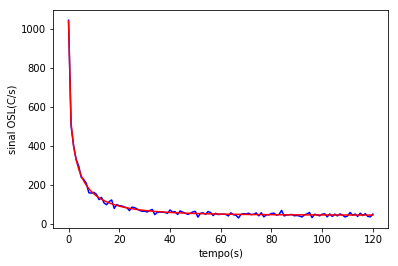

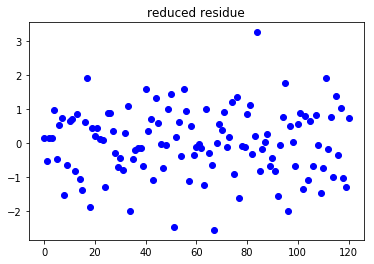

<Figure size 432x288 with 0 Axes>

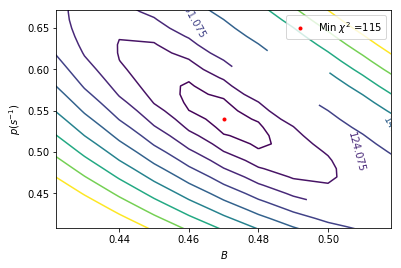

In [11]:
#######################
####example:
I0 = 1000
p=0.555
b=0.455
F = 45
par = np.array([p,b])

xx = np.arange(0,121)
sy = np.sqrt(I0*decay_stretching(xx,par) + F)
yy = np.array([I0*decay_stretching(xx[i],par) + F + np.random.normal(0,sy[i]) for i in range(len(xx))])


func = decay_stretching
delta= 0.0001
ll=100
pp1=np.array([i/ll for i in range(1,ll)])
pp2=np.array([i/ll for i in range(1,ll)])

par_estimated,cov_matrix,chi2_min,residue,QQ = two_coupled_nonlinear_parameter_estimator(func,xx,yy,sy,pp1,pp2,delta,n_gauss=0)


plt.figure(1)
par = [par_estimated[0],par_estimated[1]]
A = [par_estimated[2],par_estimated[3]]
plt.plot(xx,yy,label='dados',color='b')
plt.plot(xx,A[0]*decay_stretching(xx,par)+A[1],label='fit',color='r')
plt.xlabel('tempo(s)')
plt.ylabel('sinal OSL(C/s)')
plt.show()


plt.figure(2)
plt.title('reduced residue')
plt.plot(residue/sy,marker='o',linestyle=' ',color='b')
plt.show()
#contour plot

plt.figure(3)
x = pp1
y = pp2
X, Y = np.meshgrid(x, y)
Z = QQ
Z_min = np.min(QQ)
V = np.array([Z_min+i**2 for i in range(10)])


p1 = par_estimated[0]
p2 = par_estimated[1]
sp1 = np.sqrt(cov_matrix[0][0])
sp2 = np.sqrt(cov_matrix[1][1])
plt.figure(4)
CS = plt.contour(X, Y, Z, V)
plt.clabel(CS, inline=1, fontsize=10)
plt.plot([p2],[p1],label='Min $\chi^2$ ='+str(int(Z_min)),marker='o'    ,linestyle=' ',color='r',markersize=3)
plt.xlabel('$B$')    
plt.ylabel('$p(s^{-1})$')    
plt.xlim(p2-3*sp2,p2+3*sp2)
plt.ylim(p1-3*sp1,p1+3*sp1)

plt.legend(loc='best')
plt.show()
#######################